In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
time_series = pd.read_csv("/Users/mo/Documents/Python/csse_COVID-19_data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
stpop = pd.DataFrame(pd.read_csv("/Users/mo/Documents/Python/COVID19_Tracking/state_population.csv"))

In [3]:
def tick_dates(time_series):
    """Creates tick labels based on start, end, and in between values by finding the start and end 
    column headers, converting them to date / time, calculating the remaining three quintiles, and converting
    these five values to short month and month date."""
    start_date = datetime.strptime(time_series.columns[11], '%m/%d/%y').date()
    tick1 = start_date.strftime("%b %d")
    end_date = datetime.strptime(time_series.columns[-1], '%m/%d/%y').date()
    tick5 = end_date.strftime("%b %d")
    mid_date = start_date + (end_date - start_date)/2
    tick3 = mid_date.strftime("%b %d")
    tick2 = (start_date + (mid_date - start_date)/2).strftime("%b %d")
    tick4 = (mid_date + (end_date - mid_date)/2).strftime("%b %d")
    return (tick1, tick2, tick3, tick4, tick5)

In [4]:
time_series = pd.read_csv("/Users/mo/Documents/Python/csse_COVID-19_data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
stpop = pd.DataFrame(pd.read_csv("/Users/mo/Documents/Python/COVID19_Tracking/state_population.csv"))
day = time_series[time_series['Province_State'] == "Massachusetts"].sum().values[11:]
line1 = np.diff(time_series[time_series['Province_State'] == "Massachusetts"].sum().values[11:])


In [18]:
#Plots difference per capita - don't use
def plot2_adj_per_capita(time_series):
    """State values are aggregated across counties for each day and adjusted by population. Raw values are
    pulled from the 'time_series_covid19_confirmed_US.csv' file. Tick markers are calculated by the 'tick dates' function above."""
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
    state1 = input("Please select the first state to be plotted: ").title()
    state2 = input("Please select the second state to be plotted: ").title()
    line1 = np.diff(time_series[time_series['Province_State'] == state1].sum().values[11:] / (stpop[stpop['State'] == state1].values[0])[1])
    line2 = np.diff(time_series[time_series['Province_State'] == state2].sum().values[11:] / (stpop[stpop['State'] == state2].values[0])[1])
    plt.figure(figsize=(20,10))
    plt.plot(line1, color = 'red', label = state1)
    plt.plot(line2, color = 'blue', label = state2)
    plt.grid()
    plt.title("Change in Numbers of New COVID-19 Cases")
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

In [31]:
def plot2_adj(time_series):
    """State values are aggregated across counties for each day and adjusted by population. Raw values are
    pulled from the 'time_series_covid19_confirmed_US.csv' file. Tick markers are calculated by the 'tick dates' function above."""
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
    state1 = input("Please select the first state to be plotted: ").title()
    state2 = input("Please select the second state to be plotted: ").title()
    line1 = np.diff(time_series[time_series['Province_State'] == state1].sum().values[11:])
    line2 = np.diff(time_series[time_series['Province_State'] == state2].sum().values[11:])
    plt.figure(figsize=(20,10))
    plt.plot(line1, color = 'red', label = state1)
    plt.plot(line2, color = 'blue', label = state2)
    plt.grid()
    plt.title("Change in Numbers of New COVID-19 Cases")
    plt.legend()
    plt.xticks([0, 33.75, 67.5, 101.25, 135], [tick1, tick2, tick3, tick4, tick5]);

Please select the first state to be plotted: Texas
Please select the second state to be plotted: California


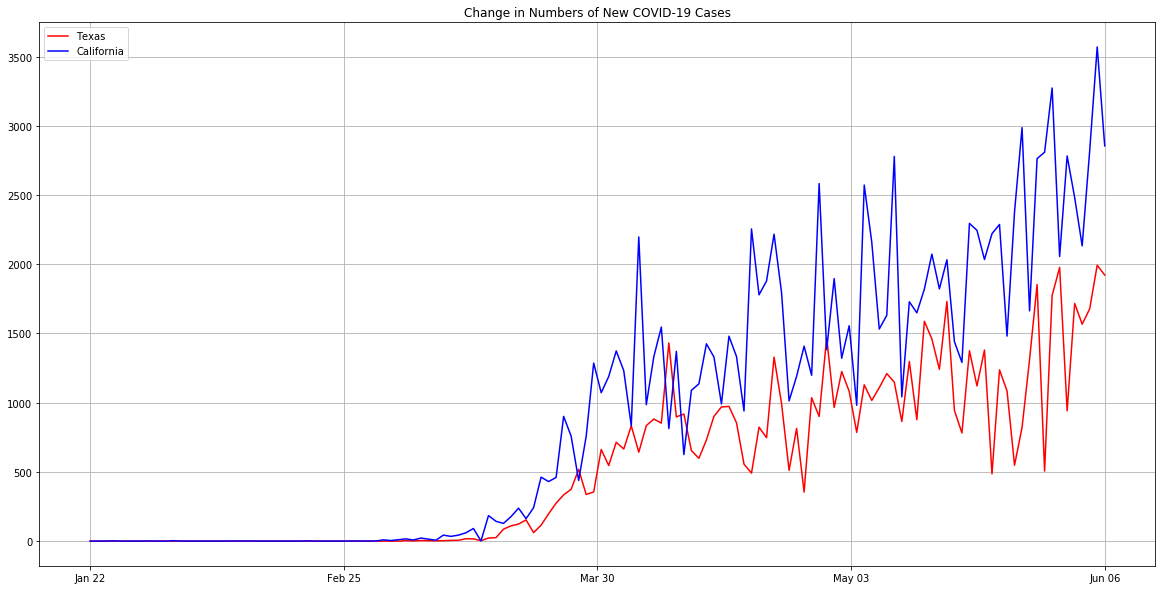

In [32]:
plot2_adj(time_series)